In [5]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import string
import matplotlib.pyplot as plt

In [9]:
tagsdf = pd.read_csv('tags_min_50.csv', index_col = 0)
tagsdf['TagName'] = tagsdf['TagName'].astype(str)
tagsdf.head()

,TagName,Count,ExcerptPostId,WikiPostId
Id,,,,
20225,qprocess,428,14678058.0,14678057.0
20226,ecma262,127,15073424.0,15073423.0
20227,contour,1237,14471240.0,14471239.0
20238,werkzeug,394,5167618.0,5167617.0
20239,httplib2,192,40217632.0,40217631.0


In [19]:
tagsdf = tagsdf.sort_values('Count', ascending=False)
tagsdf.tail(1000)

,TagName,Count,ExcerptPostId,WikiPostId
Id,,,,
87122,fenwick-tree,56,14035143.0,14035142.0
119936,horizon,56,37403562.0,37403561.0
23835,html-generation,56,NaN,NaN
60389,ligature,56,NaN,NaN
19528,igoogle,56,NaN,NaN
65173,facebook-rest-api,56,NaN,NaN
12853,external-dependencies,56,NaN,NaN
118954,jquery-3,56,36437788.0,36437787.0
29214,file-properties,56,NaN,NaN


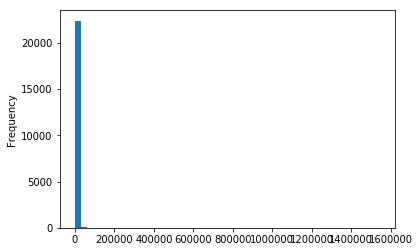

In [21]:

df = tagsdf.copy()
df.set_index('TagName', inplace = True)
df['Count'].plot(kind = 'hist', bins = 50)
plt.show()

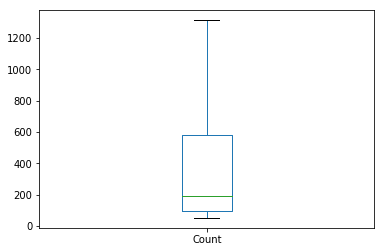

In [25]:
df = tagsdf.copy()
df.set_index('TagName', inplace = True)
df['Count'].plot(kind = 'box', sym = '')
plt.show()

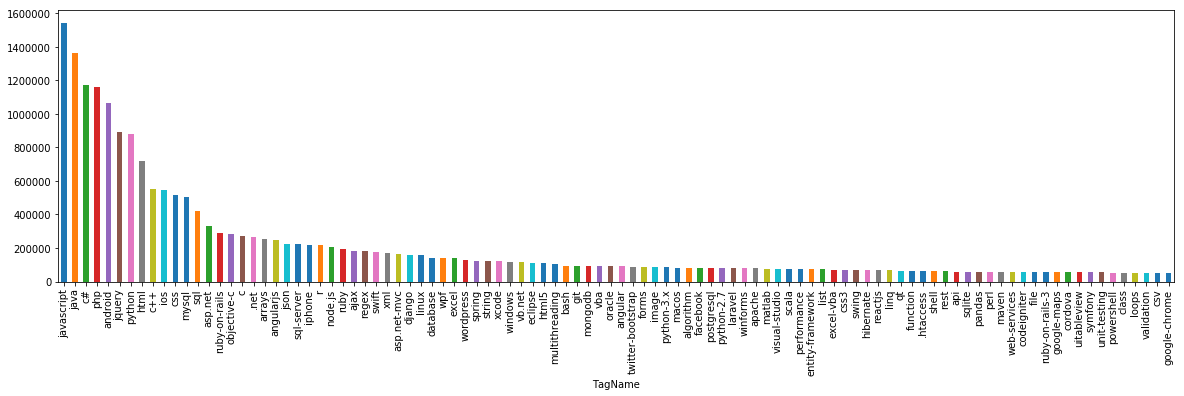

In [33]:
df = tagsdf.copy()
df.set_index('TagName', inplace = True)
df['Count'].head(100).plot(kind = 'bar', figsize = (20,5))
plt.show()

In [27]:
tagsdf['Count'].describe()

count    2.255000e+04
mean     1.979973e+03
std      2.414810e+04
min      5.100000e+01
25%      9.200000e+01
50%      1.940000e+02
75%      5.807500e+02
max      1.542204e+06
Name: Count, dtype: float64

In [4]:
tagsdf.drop(['ExcerptPostId','WikiPostId'], axis = 1).head()

,TagName,Count
Id,,
3,javascript,1542204
17,java,1362522
9,c#,1171846
5,php,1159263
1386,android,1065239


In [5]:
tagsdf['TagLen'] = tagsdf['TagName'].apply(lambda x: len(x))
tagsdf.sort_values('TagLen', ascending=False).head(20)

,TagName,Count,ExcerptPostId,WikiPostId,TagLen
Id,,,,,
128647,android-architecture-components,218,46827168.0,46827167.0,31
108673,uitableviewautomaticdimension,85,37460796.0,37460795.0,29
119526,windows-subsystem-for-linux,391,37036127.0,37036126.0,27
130435,mfmailcomposeviewcontroller,839,48017651.0,48017650.0,27
37495,nsfetchedresultscontroller,2121,8340652.0,8340651.0,26
127909,datacontractjsonserializer,140,45601368.0,45601367.0,26
56398,presentmodalviewcontroller,490,12011784.0,12011783.0,26
108056,azure-application-insights,956,26846234.0,26846233.0,26
64318,sql-server-2008r2-express,222,8759214.0,8759213.0,25


In [6]:
#How does punctuation look like in tags ?
tagsdf['TagsPunctuation'] = tagsdf['TagName'].apply(lambda cell: ''.join([x for x in cell if x in string.punctuation]))
tagsdf['TagsPunctuationLen'] = tagsdf['TagsPunctuation'].apply(lambda x: len(x))
tagsdf.sort_values('TagsPunctuationLen', ascending=False).head(20)
#string.punctuation

,TagName,Count,ExcerptPostId,WikiPostId,TagLen,TagsPunctuation,TagsPunctuationLen
Id,,,,,,,
128114,asp-net-core-mvc-2.0,237,NaN,NaN,20,----.,5
128115,asp.net-core-mvc-2.0,61,NaN,NaN,20,.---.,5
80968,visual-c++-2012,119,11174309.0,11174308.0,15,-++-,4
94975,asp.net-web-api-helppages,107,22337114.0,22337113.0,25,.---,4
127983,.net-standard-2.0,136,NaN,NaN,17,.--.,4
58980,visual-c#-express-2010,268,6270130.0,6270129.0,22,-#--,4
76120,ruby-on-rails-3.2,6978,8708981.0,8708980.0,17,---.,4
103947,.net-4.5.2,146,23555792.0,23555791.0,10,.-..,4
58779,c#-to-f#,261,4174078.0,4174077.0,8,#--#,4


In [7]:
#What about numbers ?
tagsdf['Tagsnumbers'] = tagsdf['TagName'].apply(lambda cell: ''.join([x for x in cell if x.isdigit()]))
tagsdf['TagsnumbersLen'] = tagsdf['Tagsnumbers'].apply(lambda x:len(x))
tagsdf.sort_values('TagsnumbersLen', ascending=False).head(20)

,TagName,Count,ExcerptPostId,WikiPostId,TagLen,TagsPunctuation,TagsPunctuationLen,Tagsnumbers,TagsnumbersLen
Id,,,,,,,,,
102347,adwords-apiv201402,76,37478304.0,37478303.0,18,-,1,201402,6
41776,ora-06550,67,5044154.0,5044153.0,9,-,1,06550,5
81009,ssrs-2008-r2,1999,14133201.0,14133200.0,12,--,2,20082,5
108027,biztalk-2013r2,124,26789859.0,26789858.0,14,-,1,20132,5
64318,sql-server-2008r2-express,222,8759214.0,8759213.0,25,---,3,20082,5
83412,802.11,182,12199269.0,12199268.0,6,.,1,80211,5
16369,visual-studio-2008-sp1,203,8371754.0,8371753.0,22,---,3,20081,5
90530,dynamics-ax-2012-r2,225,16552224.0,16552223.0,19,---,3,20122,5
41028,ora-00907,62,5591622.0,5591621.0,9,-,1,00907,5


In [9]:
#What doest it mean when there is so WikiPostId ?
tagsdf[tagsdf['WikiPostId'].isnull()]

,TagName,Count,ExcerptPostId,WikiPostId,TagLen,TagsPunctuation,TagsPunctuationLen,Tagsnumbers,TagsnumbersLen
Id,,,,,,,,,
57616,tableviewcell,1026,NaN,NaN,13,,0,,0
116275,azure-web-app-service,659,NaN,NaN,21,---,3,,0
11311,markers,591,NaN,NaN,7,,0,,0
4458,survey,574,NaN,NaN,6,,0,,0
19836,database-restore,539,NaN,NaN,16,-,1,,0
28221,master-slave,538,NaN,NaN,12,-,1,,0
47977,universal,515,NaN,NaN,9,,0,,0
32980,custom-view,508,NaN,NaN,11,-,1,,0
26926,retain,505,NaN,NaN,6,,0,,0
